In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

In [2]:
file_path = 'Cifar10/'
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_categories= len(categories)

X = []
Y = []

image_w = 32
image_h = 32

In [3]:
# 이미지 불러오기 및 라벨링
for category in categories:
    img_dir = file_path + category + '/'
    file_names = os.listdir(img_dir)
    for i in range(len(file_names)):
        Y.append(category)
    for name in file_names:
      img = cv2.imread(img_dir+name)
      img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
      X.append(img)

x = np.array(X) 
Y = np.array(Y)
col_name = ['label_data']
label = pd.DataFrame(Y, columns=col_name)

class_labels = {'airplane':0, 'automobile':1,'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = label.label_data.map(class_labels)
y = labels.to_numpy() 

In [4]:
print(x.shape)
print(y.shape)

(60000, 32, 32, 3)
(60000,)


In [5]:
# 원핫인코딩
y_onehot = to_categorical(y)
print(y_onehot)

# 정규화
x_normal = x.astype('float32') / 255.0
x_normal

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


array([[[[0.77254903, 0.7921569 , 0.78431374],
         [0.78039217, 0.8       , 0.7921569 ],
         [0.78431374, 0.8039216 , 0.79607844],
         ...,
         [0.7882353 , 0.80784315, 0.8039216 ],
         [0.7764706 , 0.79607844, 0.7921569 ],
         [0.77254903, 0.7921569 , 0.7882353 ]],

        [[0.8117647 , 0.83137256, 0.8235294 ],
         [0.8       , 0.81960785, 0.8117647 ],
         [0.8039216 , 0.8235294 , 0.8156863 ],
         ...,
         [0.8039216 , 0.8235294 , 0.81960785],
         [0.79607844, 0.8156863 , 0.8117647 ],
         [0.7921569 , 0.8117647 , 0.80784315]],

        [[0.827451  , 0.8392157 , 0.83137256],
         [0.8117647 , 0.8235294 , 0.8156863 ],
         [0.827451  , 0.8392157 , 0.83137256],
         ...,
         [0.81960785, 0.8392157 , 0.8352941 ],
         [0.8117647 , 0.83137256, 0.827451  ],
         [0.80784315, 0.827451  , 0.8235294 ]],

        ...,

        [[0.8666667 , 0.85882354, 0.85882354],
         [0.84313726, 0.8352941 , 0.8352941 ]

In [6]:
X_train = np.concatenate((x_normal[0:4000],x_normal[6000:10000],x_normal[12000:16000],x_normal[18000:22000],x_normal[24000:28000],x_normal[30000:34000],x_normal[36000:40000],x_normal[42000:46000],x_normal[48000:52000],x_normal[54000:58000]), axis = 0)
X_vali = np.concatenate((x_normal[4000:5000],x_normal[10000:11000],x_normal[16000:17000],x_normal[22000:23000],x_normal[28000:29000],x_normal[34000:35000],x_normal[40000:41000],x_normal[46000:47000],x_normal[52000:53000],x_normal[58000:59000]), axis = 0)
X_test = np.concatenate((x_normal[5000:6000],x_normal[11000:12000],x_normal[17000:18000],x_normal[23000:24000],x_normal[29000:30000],x_normal[35000:36000],x_normal[41000:42000],x_normal[47000:48000],x_normal[53000:54000],x_normal[59000:60000]), axis=0)
y_train = np.concatenate((y_onehot[0:4000],y_onehot[6000:10000],y_onehot[12000:16000],y_onehot[18000:22000],y_onehot[24000:28000],y_onehot[30000:34000],y_onehot[36000:40000],y_onehot[42000:46000],y_onehot[48000:52000],y_onehot[54000:58000]), axis = 0)
y_vali = np.concatenate((y_onehot[4000:5000],y_onehot[10000:11000],y_onehot[16000:17000],y_onehot[22000:23000],y_onehot[28000:29000],y_onehot[34000:35000],y_onehot[40000:41000],y_onehot[46000:47000],y_onehot[52000:53000],y_onehot[58000:59000]), axis = 0)
y_test = np.concatenate((y_onehot[5000:6000],y_onehot[11000:12000],y_onehot[17000:18000],y_onehot[23000:24000],y_onehot[29000:30000],y_onehot[35000:36000],y_onehot[41000:42000],y_onehot[47000:48000],y_onehot[53000:54000],y_onehot[59000:60000]), axis=0)

In [80]:
print(X_train.shape)
print(X_vali.shape)
print(X_test.shape)
print(y_train.shape)
print(y_vali.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 10)
(10000, 10)


In [8]:
# xy = (X_train, X_test, y_train, y_test)

# np.save("./img_data.npy", xy)

In [9]:
# X_train, X_test, Y_train, Y_test = np.load('./img_data.npy', allow_pickle=True)

In [10]:
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

In [11]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from keras import regularizers
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.constraints import maxnorm
import matplotlib.pyplot as plt
import ssl

weight_decay = 1e-4

# 모델 설계
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (32, 32, 3),
                    kernel_size = (3,3), padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), filters = 32, 
                    activation='relu'),
    BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 32, 
                    activation='relu'),
    BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.2),

    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 64,
                        activation='relu'),
    BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 64, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 128, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 128, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 256, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 256, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.5),
    
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 512, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', kernel_regularizer=regularizers.l2(weight_decay), filters = 512, 
                        activation='relu'),
    BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.5),
    
    keras.layers.Flatten(),
    Dropout(0.25),
    keras.layers.Dense(128, activation = 'relu'),
    Dropout(0.25),
    keras.layers.Dense(32, activation = 'relu'),
    Dropout(0.25),
    keras.layers.Dense(10, activation = 'softmax'),
])


In [12]:
# 모델 요악
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [13]:
# 블록 다이어그램
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [14]:
# 모델 컴파일
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습을 실시하는 과정의 손실 값과 정확도 기록
history = model.fit(X_train, 
                    y_train,  
                    epochs=100,
                    validation_data=(X_vali, y_vali),
                    batch_size=32,
                    callbacks=[es]) 

Epoch 1/100
1250/1250 [==============================] - 467s 373ms/step - loss: 2.5050 - accuracy: 0.1704 - val_loss: 2.1980 - val_accuracy: 0.2210
Epoch 2/100
1250/1250 [==============================] - 506s 405ms/step - loss: 2.1327 - accuracy: 0.2539 - val_loss: 1.9167 - val_accuracy: 0.3249
Epoch 3/100
1250/1250 [==============================] - 510s 408ms/step - loss: 1.9451 - accuracy: 0.3289 - val_loss: 1.7190 - val_accuracy: 0.4371
Epoch 4/100
1250/1250 [==============================] - 500s 400ms/step - loss: 1.7945 - accuracy: 0.3989 - val_loss: 1.6055 - val_accuracy: 0.4678
Epoch 5/100
1250/1250 [==============================] - 491s 393ms/step - loss: 1.6879 - accuracy: 0.4525 - val_loss: 1.5487 - val_accuracy: 0.5028
Epoch 6/100
1250/1250 [==============================] - 505s 404ms/step - loss: 1.5855 - accuracy: 0.4990 - val_loss: 1.3600 - val_accuracy: 0.5650
Epoch 7/100
1250/1250 [==============================] - 501s 401ms/step - loss: 1.5074 - accuracy: 0.5342

Epoch 56/100
1250/1250 [==============================] - 499s 400ms/step - loss: 0.6735 - accuracy: 0.8510 - val_loss: 0.7511 - val_accuracy: 0.8227
Epoch 57/100
1250/1250 [==============================] - 504s 404ms/step - loss: 0.6603 - accuracy: 0.8541 - val_loss: 0.7584 - val_accuracy: 0.8195
Epoch 58/100
1250/1250 [==============================] - 488s 390ms/step - loss: 0.6709 - accuracy: 0.8543 - val_loss: 0.7651 - val_accuracy: 0.8175
Epoch 59/100
1250/1250 [==============================] - 467s 374ms/step - loss: 0.6499 - accuracy: 0.8587 - val_loss: 0.7593 - val_accuracy: 0.8174
Epoch 60/100
1250/1250 [==============================] - 470s 376ms/step - loss: 0.6421 - accuracy: 0.8602 - val_loss: 0.7552 - val_accuracy: 0.8216
Epoch 61/100
1250/1250 [==============================] - 466s 373ms/step - loss: 0.6434 - accuracy: 0.8609 - val_loss: 0.7651 - val_accuracy: 0.8179
Epoch 62/100
1250/1250 [==============================] - 469s 375ms/step - loss: 0.6399 - accuracy:

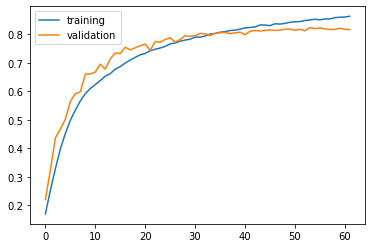

In [15]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

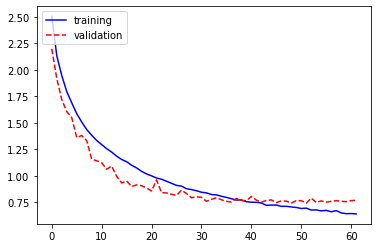

In [16]:
# Loss
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [46]:
# 테스트 결과 및 시간
%%time
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 23s - loss: 0.8092 - accuracy: 0.8116
테스트 정확도: 0.8116000294685364
Wall time: 23.4 s


In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_test2 = np.concatenate((y[5000:6000],y[11000:12000],y[17000:18000],y[23000:24000],y[29000:30000],y[35000:36000],y[41000:42000],y[47000:48000],y[53000:54000],y[59000:60000]), axis=0)
y_train2 = np.concatenate((y[0:5000],y[6000:11000],y[12000:17000],y[18000:23000],y[24000:29000],y[30000:35000],y[36000:41000],y[42000:47000],y[48000:53000],y[54000:59000]), axis = 0)
X_train2 = np.concatenate((x_normal[0:5000],x_normal[6000:11000],x_normal[12000:17000],x_normal[18000:23000],x_normal[24000:29000],x_normal[30000:35000],x_normal[36000:41000],x_normal[42000:47000],x_normal[48000:53000],x_normal[54000:59000]), axis = 0)

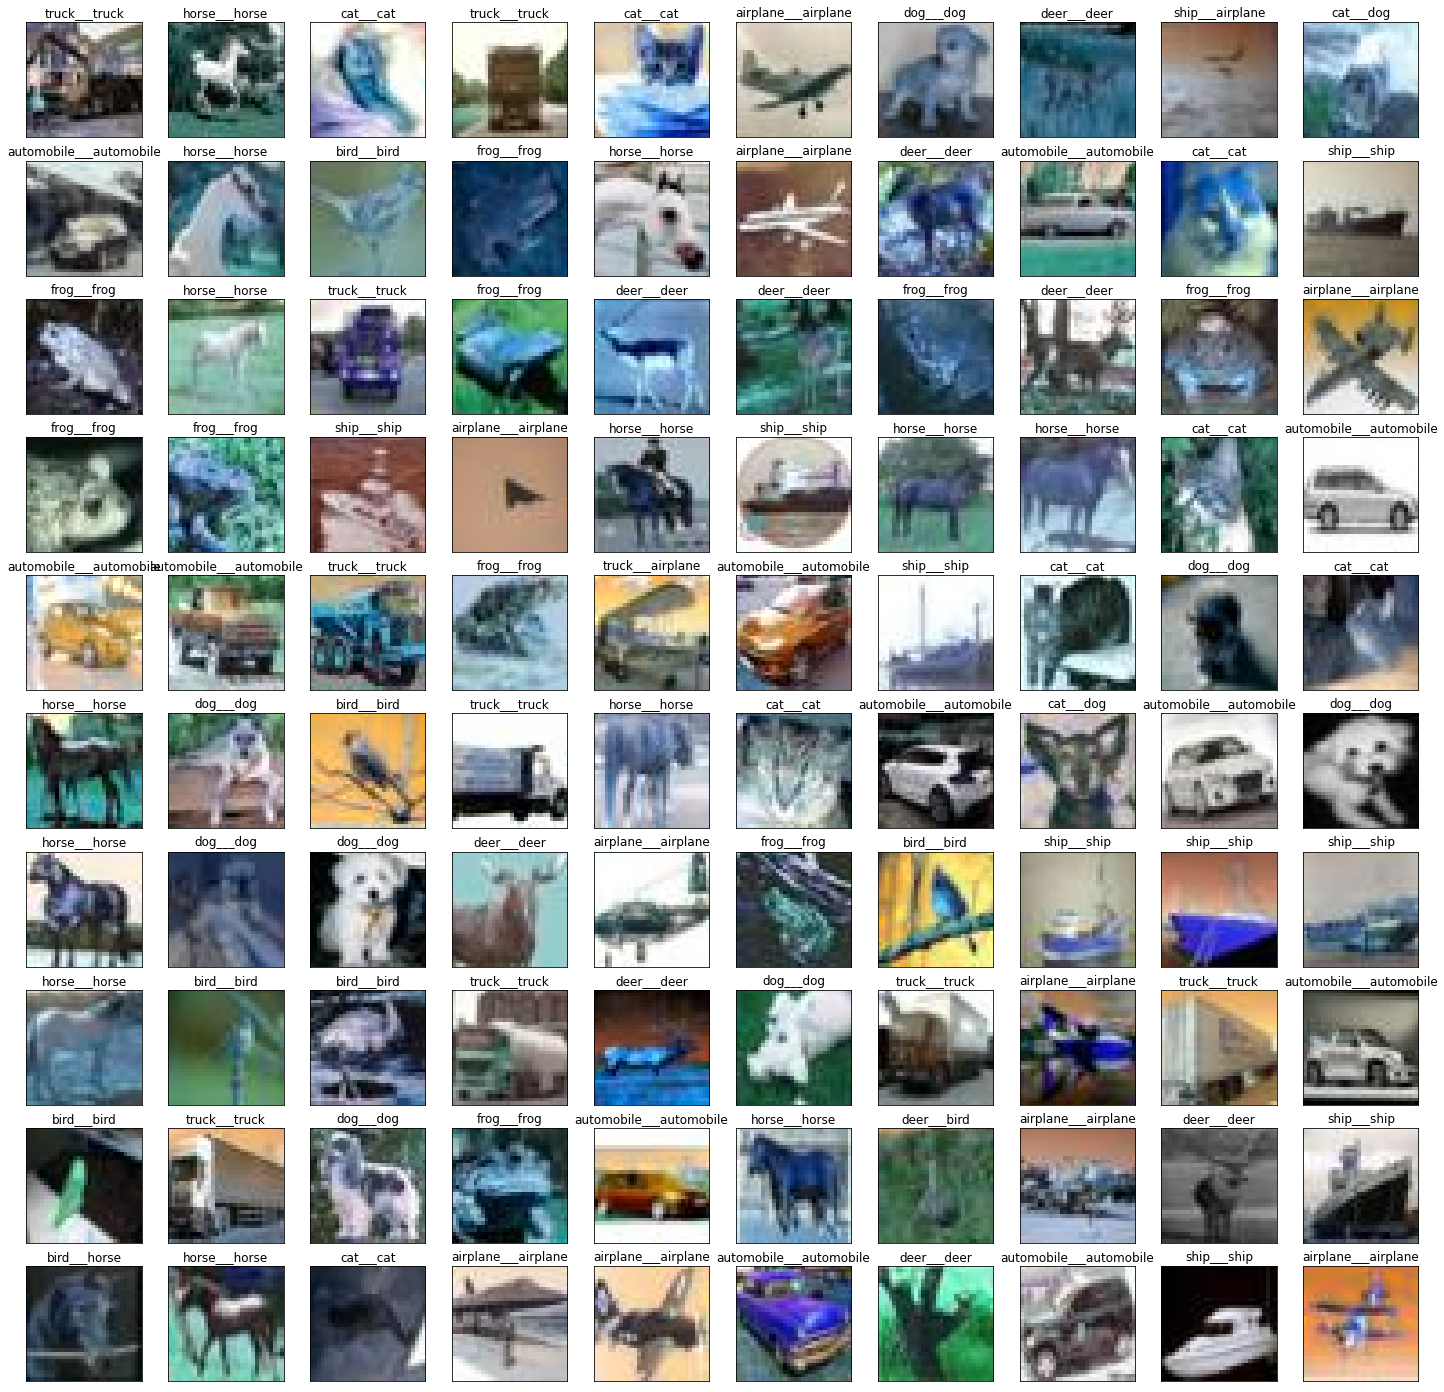

In [62]:
# train set 100장
import random

plt.figure(figsize=(25, 25))

predictions = np.argmax(model.predict(X_train2),axis=1)

#여기가 정답출력 빼고 완성된곳~!~!~!
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    num = random.randrange(1, 50001)
    pred_idx = predictions[num]     
    true_idx = y_train2[num]
    plt.imshow(X_train2[num])
    plt.title(class_names[pred_idx]+'___'+class_names[true_idx]) #예측값과 정답

plt.show()

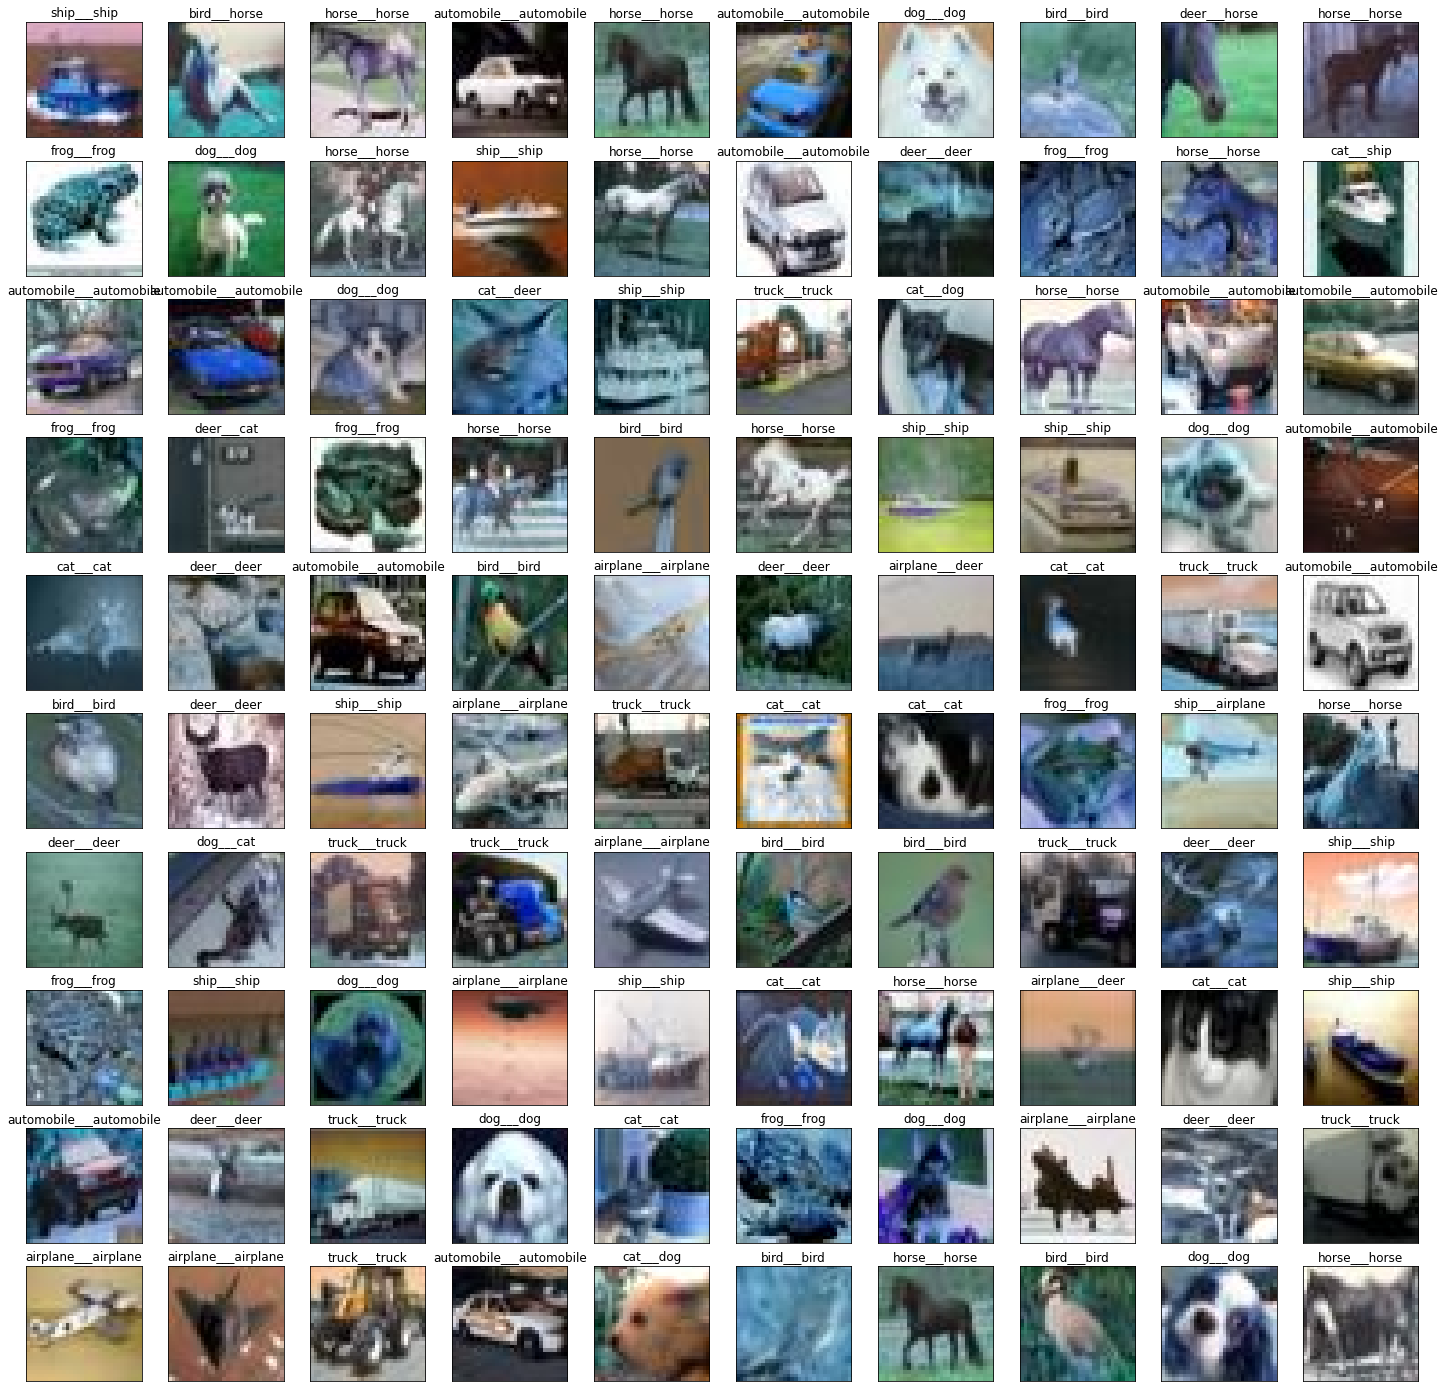

In [52]:
# test set 100장
import random

plt.figure(figsize=(25, 25))

predictions = np.argmax(model.predict(X_test),axis=1)

#여기가 정답출력 빼고 완성된곳~!~!~!
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    num = random.randrange(1, 10001)
    pred_idx = predictions[num]     
    true_idx = y_test2[num]
    plt.imshow(X_test[num])
    plt.title(class_names[pred_idx]+'___'+class_names[true_idx]) #예측값과 정답

plt.show()

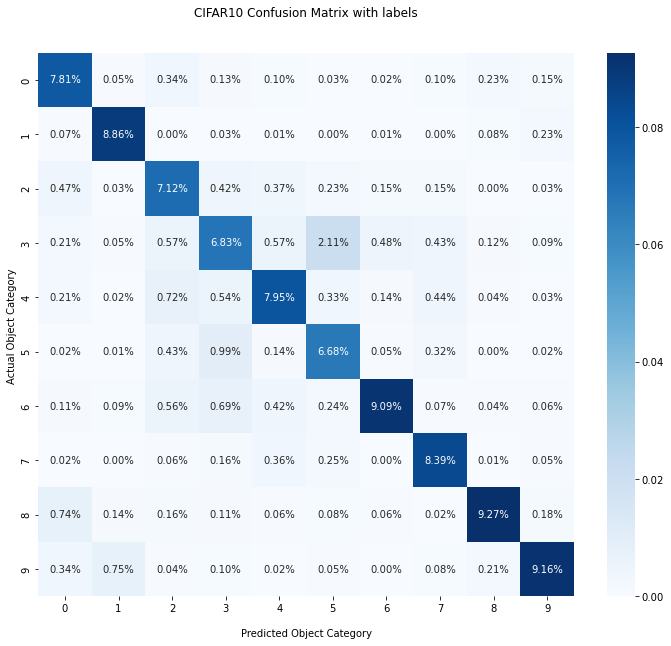


Accuracy: 0.81



In [47]:
# 히트맵
from sklearn.metrics import confusion_matrix
import seaborn as sns


# from helper import ModelOptimizer
test_results=np.argmax(model.predict(X_test),axis=1)
cf_matrix = confusion_matrix(test_results, y_test2)

plt.figure(figsize=(12,10))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

ax.set_title('CIFAR10 Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Object Category')
ax.set_ylabel('Actual Object Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels.values())
ax.yaxis.set_ticklabels(class_labels.values())

## Display the visualization of the Confusion Matrix.
plt.show()

accuracy = np.trace(cf_matrix)/len(y_test)
print('\nAccuracy: {:.2f}\n'.format(accuracy))

In [75]:
model.save("cifar_cnn_1조.h5")

In [79]:
new_model = keras.models.load_model('cifar_cnn_1조.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1